In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lista_LSTM = []
lista = [1,3,5,7,10,12,14,18,21]
for i in lista:
    cadena = "Dataframes/lstmH" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_LSTM.append(df)

In [ ]:
def pintarLSTM(epoch):
    batch_sizes = [4, 8, 12, 16, 32, 64, 128, 256]
    horas = [1,3,5,7,10,12,14,18,21]


    # Etiquetas y estilos
    labels = ["1 hora", "3 hora", "5 hora", "7 hora", "10 horas",]
    estilos = ['-'] * 5
    colores = sns.color_palette("husl", 5)            

    # Crear la figura
    plt.figure(figsize=(11, 7))
    plt.title("Comparación en función de las horas (Epoch = " +str(epoch)+ ")")

    for j, df in enumerate(lista_LSTM):
        df.columns = df.columns.str.strip()
        df_subset = df[(df["epoch"] == epoch)]

        sns.lineplot(data=df_subset, x="batch_size", y="value",
                    label=labels[j], linestyle=estilos[j], color=colores[j])

    plt.xlabel("Batch Size")
    plt.ylabel("Valor")
    plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

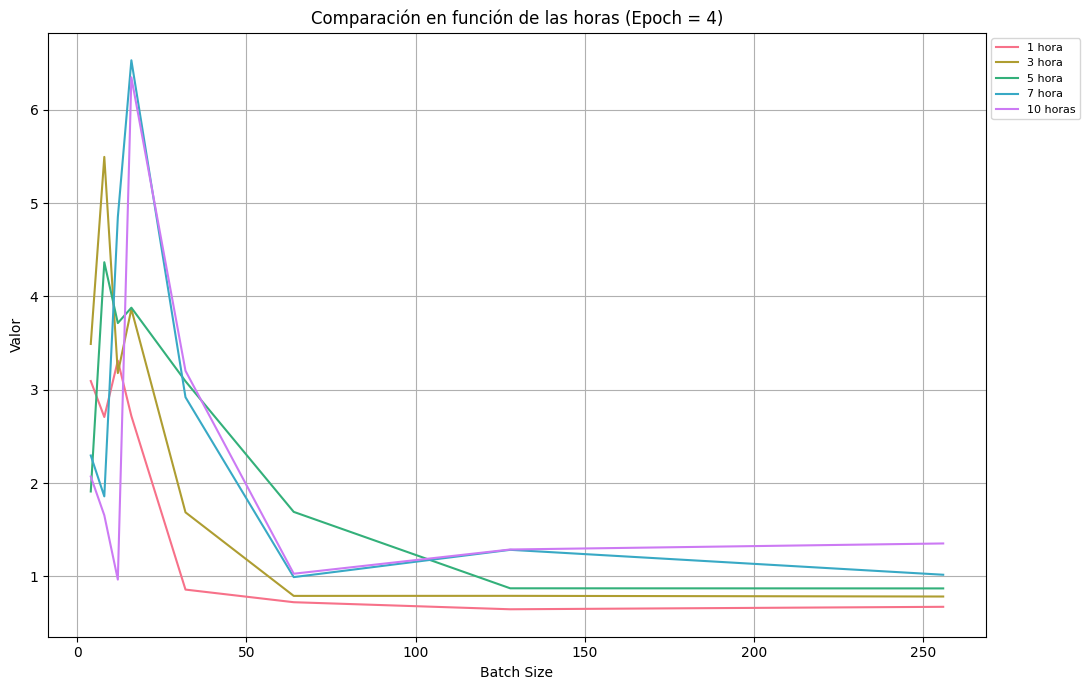

In [4]:
pintarLSTM(4)

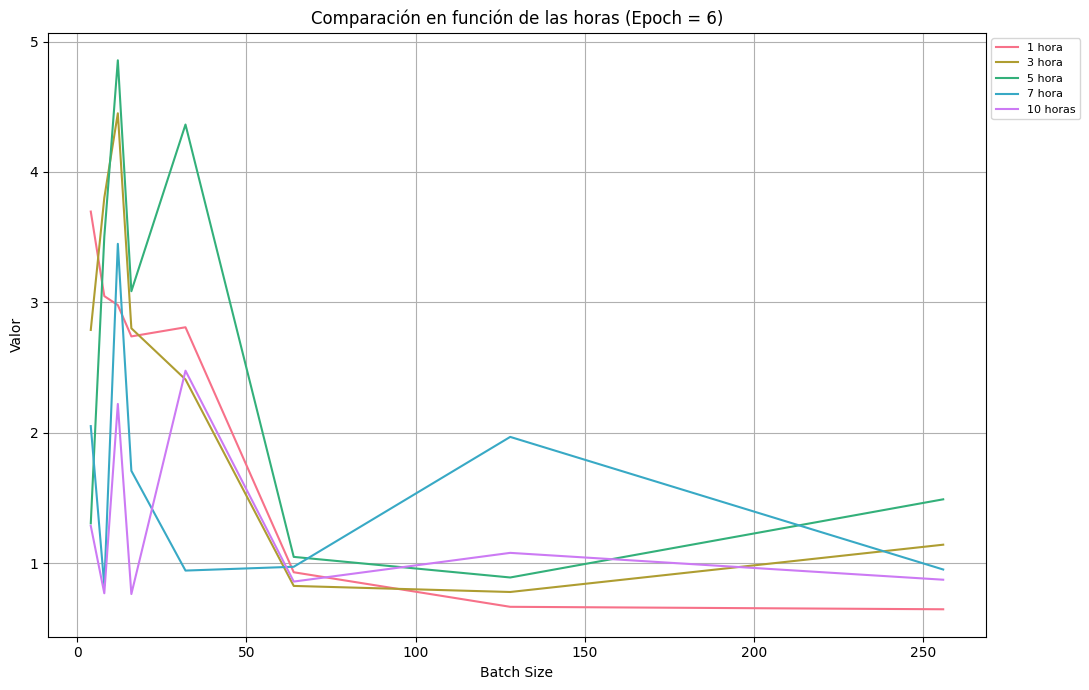

In [5]:
pintarLSTM(6)

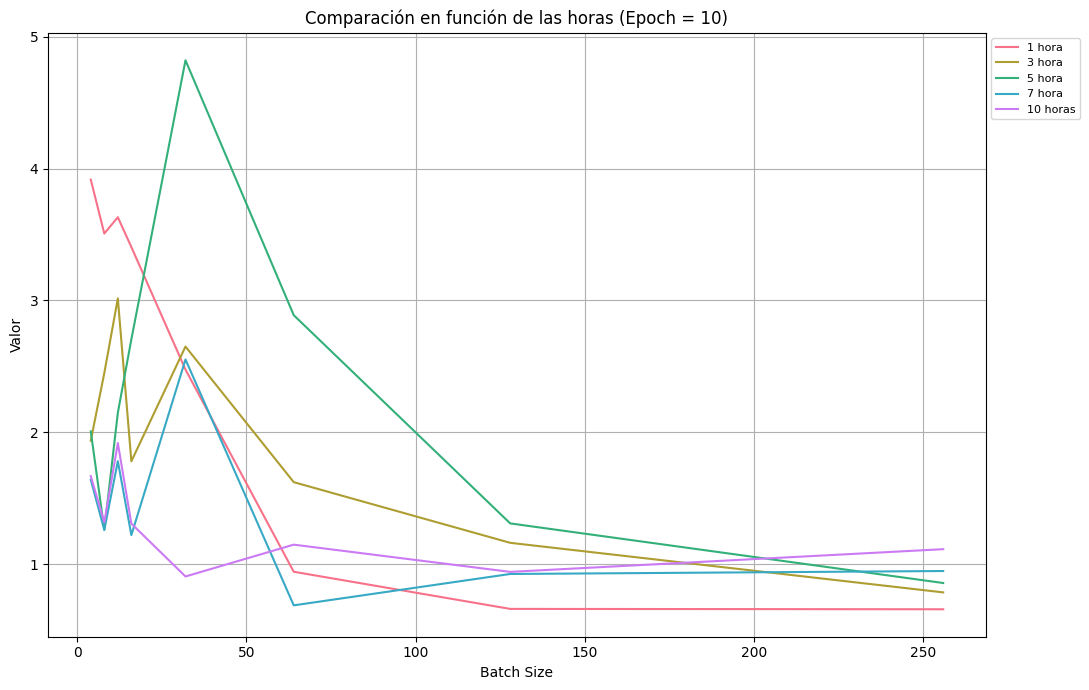

In [6]:
pintarLSTM(10)

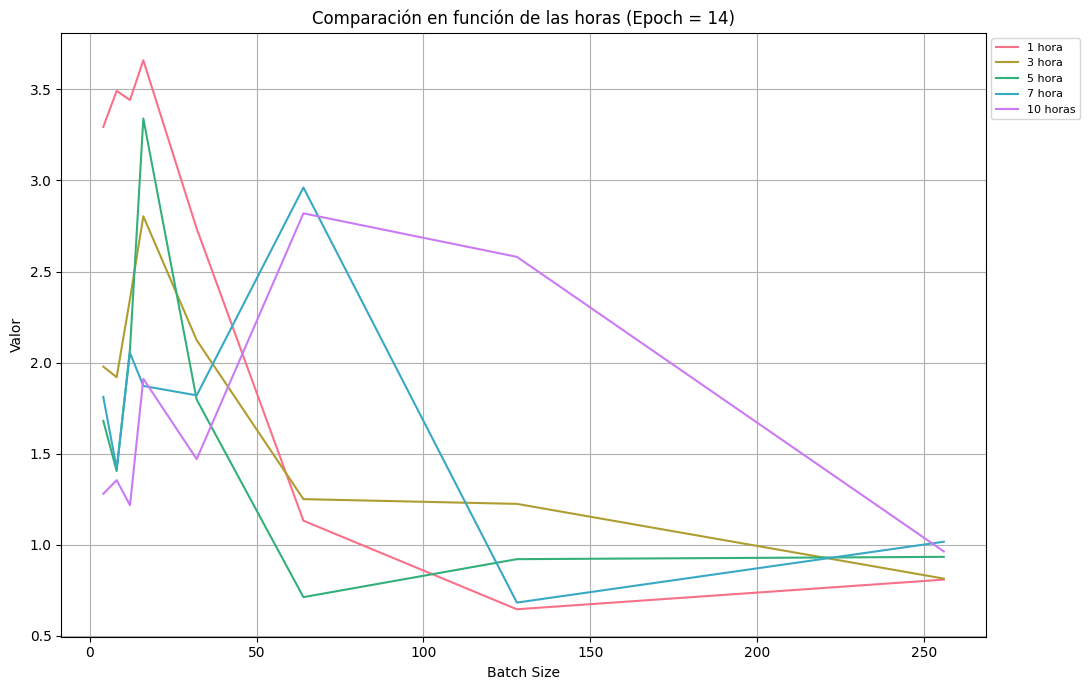

In [7]:
pintarLSTM(14)

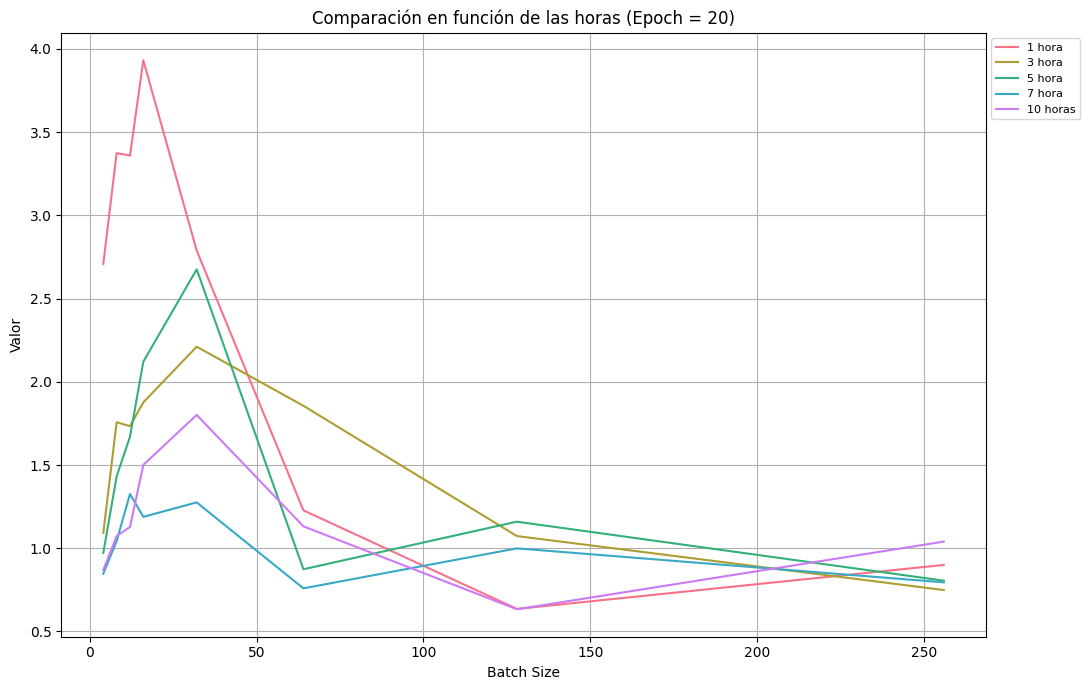

In [8]:
pintarLSTM(20)

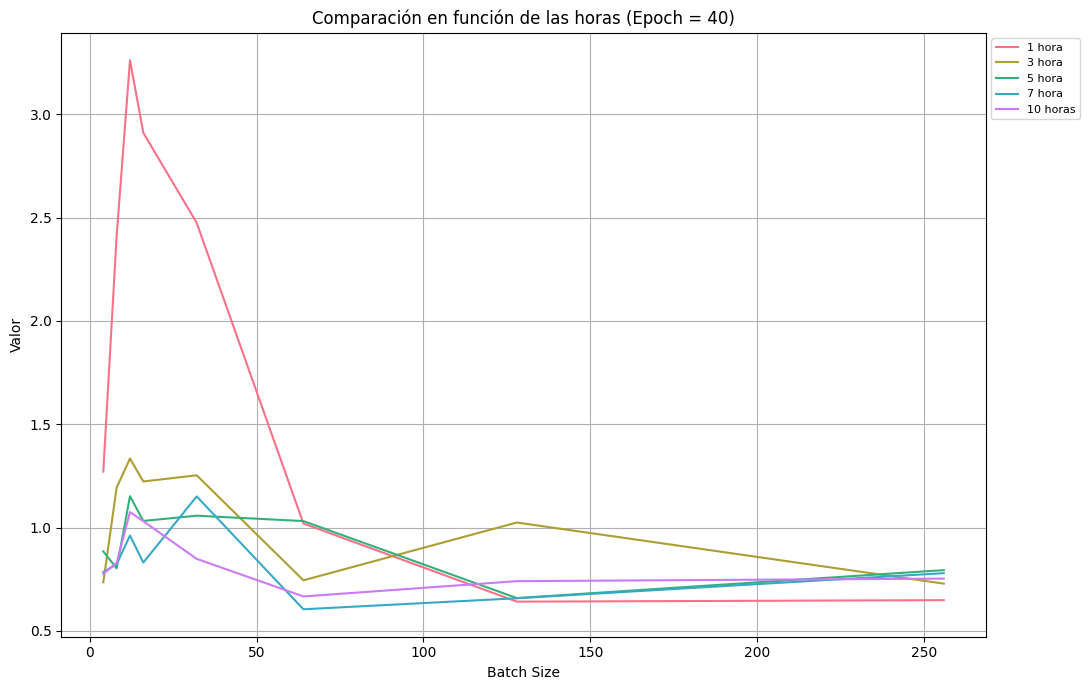

In [9]:
pintarLSTM(40)

In [10]:
mejor_valor = float('inf')  # Empiezo con infinito
mejor_info = None
mejor_dataframe_idx = None

# REcorro todos los dataframes
for idx, df in enumerate(lista_LSTM):
    fila_minima = df.loc[df['value'].idxmin()]
    
    if fila_minima['value'] < mejor_valor:
        mejor_valor = fila_minima['value']
        mejor_info = fila_minima
        mejor_dataframe_idx = idx

# Muestro resultado
print(f"El menor valor está en el DataFrame número {mejor_dataframe_idx}")
print("Datos de la mejor fila:")
print(mejor_info)

El menor valor está en el DataFrame número 3
Datos de la mejor fila:
epoch         40.000000
batch_size    64.000000
value          0.604304
Name: 45, dtype: float64
